Things to consider:

* Structure of true system known or not

* Cost of intervention (look at outcome under different cost per action scenarios)

* Proportion of variables in system that are observed

* Must ensure that results are reproducible (work out consistent random seed?)

In [5]:
import itertools
import pandas as pd
from true_systems.mammonet_breast_cancer_diagnosis import mammonet_system

In [16]:
# create all scenarios
true_systems = ["mammonet"]
cost_per_intervention = [0,10]
true_system_structure_known = ["yes","no"]
proportion_of_variables_observed = [1.0, 0.75, 0.5]
all_scenario_variables = [
    true_systems,
    cost_per_intervention,
    true_system_structure_known,
    proportion_of_variables_observed,
]
all_scenarios = itertools.product(*all_scenario_variables)
cntr = 0
for scenario in all_scenarios:
    cntr += 1
    print(f"scenario {cntr}: true_system={scenario[0]}, cost_per_intervention={scenario[1]} true_system_structure_known={scenario[2]} proportion_of_variables_observed={scenario[3]}\n")

scenario 1: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=1.0

scenario 2: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=0.75

scenario 3: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=0.5

scenario 4: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=1.0

scenario 5: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=0.75

scenario 6: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=0.5

scenario 7: true_system=mammonet, cost_per_intervention=10 true_system_structure_known=yes proportion_of_variables_observed=1.0

scenario 8: true_system=mammonet, cost_per_intervention=10 true_system_structure_known=yes proportion_of


    System Name:    MammoNet
    System Source:  [paper] Construction of a Bayesian Network for Mammographic Diagnosis of Breast Cancer Kahn Jr et al. (1996)
    


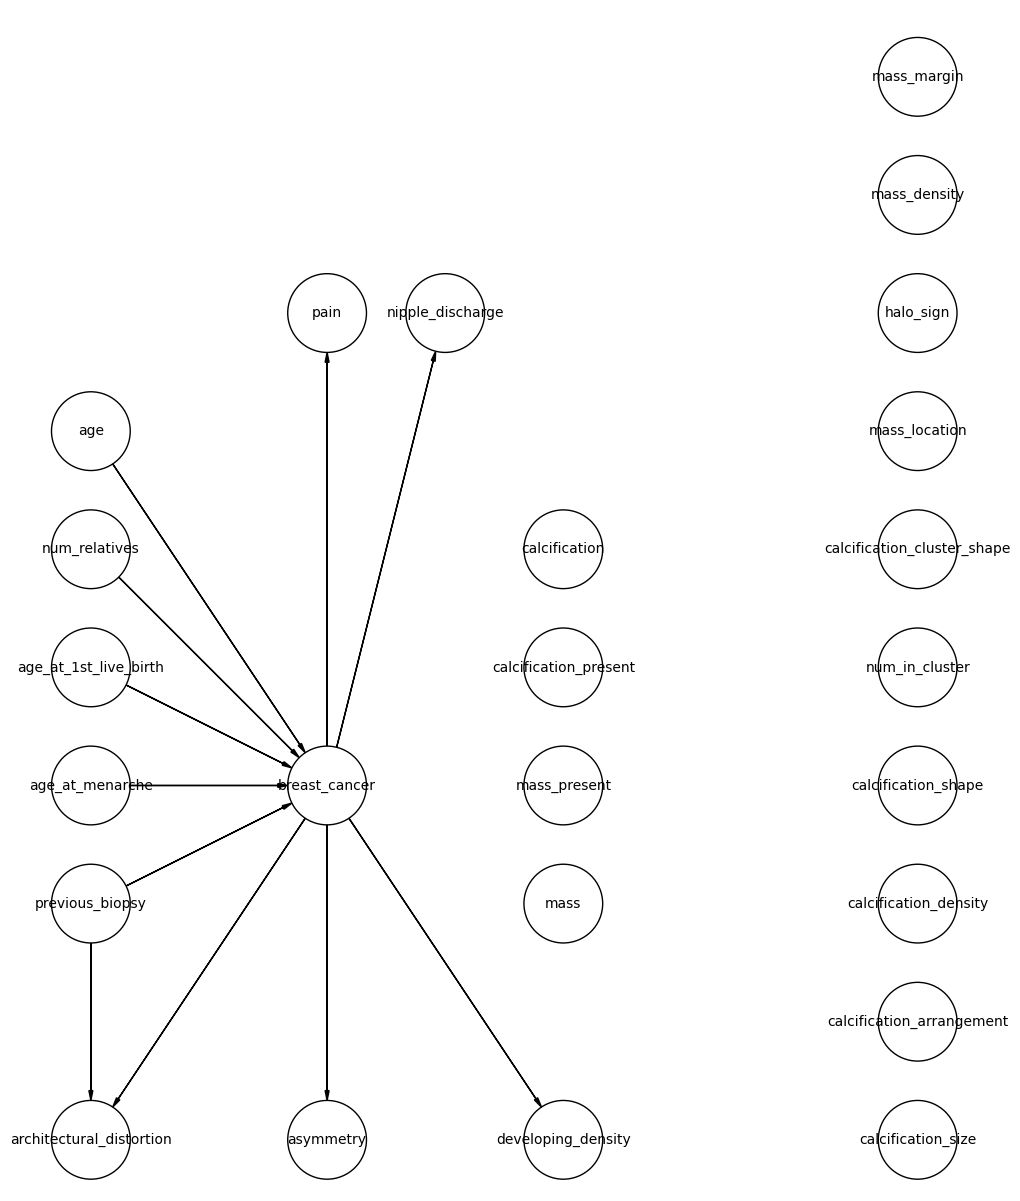

In [2]:
print(
    f"""
    System Name:    {mammonet_system.system_name}
    System Source:  {mammonet_system.system_source}
    """
)
mammonet_system.visualize_system()
